# Problem statement 
To develop a machine learning model capable of predicting the groundwater potential of aquifers, quantified on a scale of 0 to 1, indicating the yield of an aquifer.

### Background and Rationale
- Transmissivity: Defined as the measure of the ease of groundwater flow through an aquifer, calculated by multiplying the hydraulic conductivity by the thickness of the aquifer. This metric serves as a comprehensive indicator of water flow ease, rendering hydraulic conductivity as a feature is redundant when transmissivity is available.
- The following features are what are considered in predicting aquifer storage in this project. 
    - Aquifer thickness 
    - Transimisivity  
    - hydraulic conductivy 
    - Fracture contrast 
    - Transverse resistance 
    - longitudinal conductance 
    - Overburden thickness 
    - aquifer resistivity 
    - Reflection co-efficient



In [435]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.svm import LinearSVR


np.random.seed(42)  # Ensure reproducibility for scipy.stats operations involving randomness


## Section 1: Load up and describe data 

In [436]:
# Settings
pd.set_option('display.max_columns', None)

In [437]:
# load up the datasets
df_1 = pd.read_excel("data/dataset_2.xlsx")
df_1.head()

VES S/N  Easting (Min)  Northing (Min)  Elev(m)  No. of Layer Curve Types  \
0        1          36.94           28.00    343.0             4          KH   
1        2          36.73           28.80    359.0             4          KH   
2        3          36.60           28.75    397.0             3           A   
3        4          36.84           29.58    342.0             3           H   
4        5          36.60           29.54    348.0             3           H   

   Thickness Topsoil h1(m)  Thickness Laterite h2(m)  \
0                      1.1                       4.9   
1                      0.8                       1.6   
2                      0.8                       0.0   
3                      0.9                       0.0   
4                      2.5                       0.0   

   Thickness weathered h3 (m)  Corrected Thick. weathered (m) H3  \
0                        23.4                            25.0146   
1                        22.7                            24.2663   
2                         9.5                            10.1555   
3                         6.7                             7.1623   
4                        62.2                            66.4918   

   Thickness Fractured h4 (m)  Corrected Thick. Fractured (m) H4  \
0                         0.0                                0.0   
1                         0.0                                0.0   
2                         0.0                                0.0   
3                         0.0                                0.0   
4                         0.0                                0.0   

   Thick. Overb.\nB1=h1+h2  Total Aquifer Thick. B2=h3+h4  \
0                      6.0                           23.4   
1                      2.4                           22.7   
2                      0.8                            9.5   
3                      0.9                            6.7   
4                      2.5                           62.2   

   Corrected Total Aquifer Thick      p1     p2      p3     p4  p5  \
0                        25.0146   128.3  213.0    52.7  137.7 NaN   
1                        24.2663   518.0  583.0   252.0  752.0 NaN   
2                        10.1555    12.4   68.0   385.6    NaN NaN   
3                         7.1623   309.8  174.1  3533.3    NaN NaN   
4                        66.4918  1303.7  292.7   940.5    NaN NaN   

   Res. Of Topsoil  Res. Of Laterite  Long. Cond. (mhos) Topsoil  \
0            128.3             213.0                    0.008574   
1            518.0             518.0                    0.001544   
2             12.4               0.0                    0.064516   
3            309.8               0.0                    0.002905   
4           1303.7               0.0                    0.001918   

   Long. Cond. (mhos) Laterite  Long. Cond. (mhos) OVERBURRDEN  \
0                     0.023005                        0.031578   
1                     0.003089                        0.004633   
2                     0.000000                        0.064516   
3                     0.000000                        0.002905   
4                     0.000000                        0.001918   

   Logarithm of Topsoil  RESISTIVITY OF FRESH BASEMENT  \
0              2.108227                          137.7   
1              2.714330                          752.0   
2              1.093422                          385.6   
3              2.491081                         3533.3   
4              3.115178                          940.5   

   Logarithm Fresh Basement  AQUIFER RES of Weathered. \n(Ohm-M)  \
0                  2.138934                                 52.7   
1                  2.876218                                252.0   
2                  2.586137                                 68.0   
3                  3.548181                                174.1   
4                  2.973359                                292.7   

   Logarithm We

In [438]:
df_1.columns

Index(['VES S/N', 'Easting (Min)', 'Northing (Min)', 'Elev(m)', 'No. of Layer',
       'Curve Types', 'Thickness Topsoil h1(m)', 'Thickness Laterite h2(m)',
       'Thickness weathered h3 (m)', 'Corrected Thick. weathered (m) H3',
       'Thickness Fractured h4 (m)', 'Corrected Thick. Fractured (m) H4',
       'Thick. Overb.\nB1=h1+h2', 'Total Aquifer Thick. B2=h3+h4',
       'Corrected Total Aquifer Thick', 'p1', 'p2', 'p3', 'p4', 'p5',
       'Res. Of Topsoil', 'Res. Of Laterite', 'Long. Cond. (mhos) Topsoil',
       'Long. Cond. (mhos) Laterite', 'Long. Cond. (mhos) OVERBURRDEN',
       'Logarithm of Topsoil', 'RESISTIVITY OF FRESH BASEMENT',
       'Logarithm Fresh Basement', 'AQUIFER RES of Weathered. \n(Ohm-M)',
       'Logarithm Weathered', 'Hydraulic Conductivity (K)',
       'Transmissivity (T)', 'Wrong', 'Aquifer storage '],
      dtype='object')

In [439]:
df_1.describe()

VES S/N  Easting (Min)  Northing (Min)     Elev(m)  No. of Layer  \
count  253.000000     253.000000      253.000000  253.000000    253.000000   
mean   127.000000      33.721700       30.040079  329.477075      3.379447   
std     73.179004       2.190428        1.293328   56.739089      0.510109   
min      1.000000      29.340000       27.600000  143.000000      3.000000   
25%     64.000000      32.060000       29.050000  305.000000      3.000000   
50%    127.000000      33.780000       29.950000  323.000000      3.000000   
75%    190.000000      35.520000       30.820000  343.000000      4.000000   
max    253.000000      37.080000       33.540000  930.000000      5.000000   

       Thickness Topsoil h1(m)  Thickness Laterite h2(m)  \
count               253.000000                253.000000   
mean                  2.248221                  2.306719   
std                   2.456100                  4.960430   
min                   0.300000                  0.000000   
25%                   1.000000                  0.000000   
50%                   1.500000                  0.000000   
75%                   2.200000                  2.500000   
max                  12.700000                 39.900000   

       Thickness weathered h3 (m)  Corrected Thick. weathered (m) H3  \
count                  253.000000                         253.000000   
mean                    17.458933                          18.663599   
std                      9.286192                           9.926939   
min                      2.400000                           2.565600   
25%                     10.100000                          10.796900   
50%                     15.800000                          16.890200   
75%                     23.100000                          24.693900   
max                     62.200000                          66.491800   

       Thickness Fractured h4 (m)  Corrected Thick. Fractured (m) H4  \
count                  253.000000                         253.000000   
mean                     0.300000                           0.320700   
std                      2.507006                           2.679989   
min                      0.000000                           0.000000   
25%                      0.000000                           0.000000   
50%                      0.000000                           0.000000   
75%                      0.000000                           0.000000   
max                     27.600000                          29.504400   

       Thick. Overb.\nB1=h1+h2  Total Aquifer Thick. B2=h3+h4  \
count               253.000000                     253.000000   
mean                  4.554941                      17.758933   
std                   5.303707                       9.482269   
min                   0.400000                       2.400000   
25%                   1.600000                      10.600000   
50%                   2.300000                      16.500000   
75%                   5.800000                      23.400000   
max                  40.800000                      62.200000   

       Corrected Total Aquifer Thick           p1           p2            p3  \
count                     253.000000   253.000000   253.000000    253.000000   
mean                       18.984299   250.245889   202.835217    744.699684   
std                        10.136545   291.008500   434.231545   1632.989814   
min                         2.565600    12.400000     4.600000      7.000000   
25%                        11.331400    88.700000    24.100000    108.700000   
50%                        17.638500   157.300000    46.300000    284.500000   
75%                        25.014600   284.200000   133.600000    682.700000   
max                        66.491800  2524.200000  3325.000000  17762.300000   

                p4           p5  Res. Of Topsoil  Res. Of Laterite  \
count    90.000000     4.000000       253.000000        253.000000   
mean    770.207778   

In [440]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   VES S/N                             253 non-null    int64  
 1   Easting (Min)                       253 non-null    float64
 2   Northing (Min)                      253 non-null    float64
 3   Elev(m)                             253 non-null    float64
 4   No. of Layer                        253 non-null    int64  
 5   Curve Types                         252 non-null    object 
 6   Thickness Topsoil h1(m)             253 non-null    float64
 7   Thickness Laterite h2(m)            253 non-null    float64
 8   Thickness weathered h3 (m)          253 non-null    float64
 9   Corrected Thick. weathered (m) H3   253 non-null    float64
 10  Thickness Fractured h4 (m)          253 non-null    float64
 11  Corrected Thick. Fractured (m) H4   253 non-n

### Insights from description and info 

- The average value for aquifer storage is found to be 22.4. According to the literature, it is recommended that an aquifer storage exceeding 60 percent is indicative of a good water-bearing capacity. This recommendation is from W.O. Raji and K.A. Abdulkadir in their 2020 study.
- Most of the values we want to use for the study are not null


## Section 2: Feature Selection
In order to select the features that would be used in this project, plotting to visualize the data is essential. 
This will help visualize similarities between the features if any 



#### Assumptions:

1. Easting: Represents longitude values. (X axis )
2. Northing: Represents latitude values. (Y axis )



In [441]:
cols_to_plot = [
      'Thickness Topsoil h1(m)', 'Thickness Laterite h2(m)',
       'Thickness weathered h3 (m)',
       'Thickness Fractured h4 (m)', 
       'Thick. Overb.\nB1=h1+h2', 'Total Aquifer Thick. B2=h3+h4',
       'Corrected Total Aquifer Thick',
       'Res. Of Topsoil', 'Res. Of Laterite', 'Long. Cond. (mhos) Topsoil',
       'Long. Cond. (mhos) Laterite', 'Long. Cond. (mhos) OVERBURRDEN',
       'Logarithm of Topsoil', 'RESISTIVITY OF FRESH BASEMENT',
       'Logarithm Fresh Basement', 'AQUIFER RES of Weathered. \n(Ohm-M)',
       'Logarithm Weathered', 'Hydraulic Conductivity (K)',
       'Transmissivity (T)', 'Aquifer storage '
]


In [442]:
# Create a function for making plots 
def plot_features(df, cols_to_plot, scale_data=False, title="", add_scatter=False):
    """
    Plot data for specified columns. Optionally scale the data before plotting.

    Parameters:
    - df: DataFrame containing the data
    - cols_to_plot: list of columns to plot
    - scale_data: boolean, if True, scale the data in cols_to_plot before plotting
    """
    # Copy the DataFrame to avoid modifying the original
    df_to_plot = df.copy()
    
    if scale_data:
        # Initialize StandardScaler
        scaler = RobustScaler()
        # Apply StandardScaler only to the specified columns
        df_to_plot[cols_to_plot] = scaler.fit_transform(df[cols_to_plot])

    n_plots = len(cols_to_plot)
    max_plots_per_row = 3

    # Calculate nrows and ncols for subplots
    ncols = min(n_plots, max_plots_per_row)
    nrows = (n_plots + max_plots_per_row - 1) // max_plots_per_row

    # Plotting the data on the same image
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*6), squeeze=False)

    # Add a general title for the entire plot
    if title:
        fig.suptitle(title, fontsize=16)


    for i, col in enumerate(cols_to_plot):
        # Calculate row and column index for subplot
        row = i // ncols
        col_idx = i % ncols

        ax = axs[row, col_idx]
        # Plot using original or scaled data as per the scale_data flag
        contour = ax.tricontourf(df['Easting (Min)'], df['Northing (Min)'], df_to_plot[col], cmap="copper")
        fig.colorbar(contour, ax=ax, label=col)
        ax.set_title(f'Plot for {col}' + (' (Scaled)' if scale_data else ''))
        ax.set_xlabel('Longitude (Easting)')
        ax.set_ylabel('Latitude (Northing)')
        # If add_scatter is True, superimpose a scatter plot
        # If add_text_markers is True, use text to represent the scatter plot
        if add_scatter:
            # Loop through data points to annotate with text
            for _, row_data in df.iterrows():
                ax.annotate(
                    row_data['VES S/N'],  # Text to represent the data point
                    (row_data['Easting (Min)'], row_data['Northing (Min)']),  # Coordinates for annotation
                    color='white',  # Color of the text
                    fontsize=9,  # Font size
                    ha='center',  # Horizontal alignment
                    va='center',  # Vertical alignment
                )

    plt.tight_layout()
    plt.show()


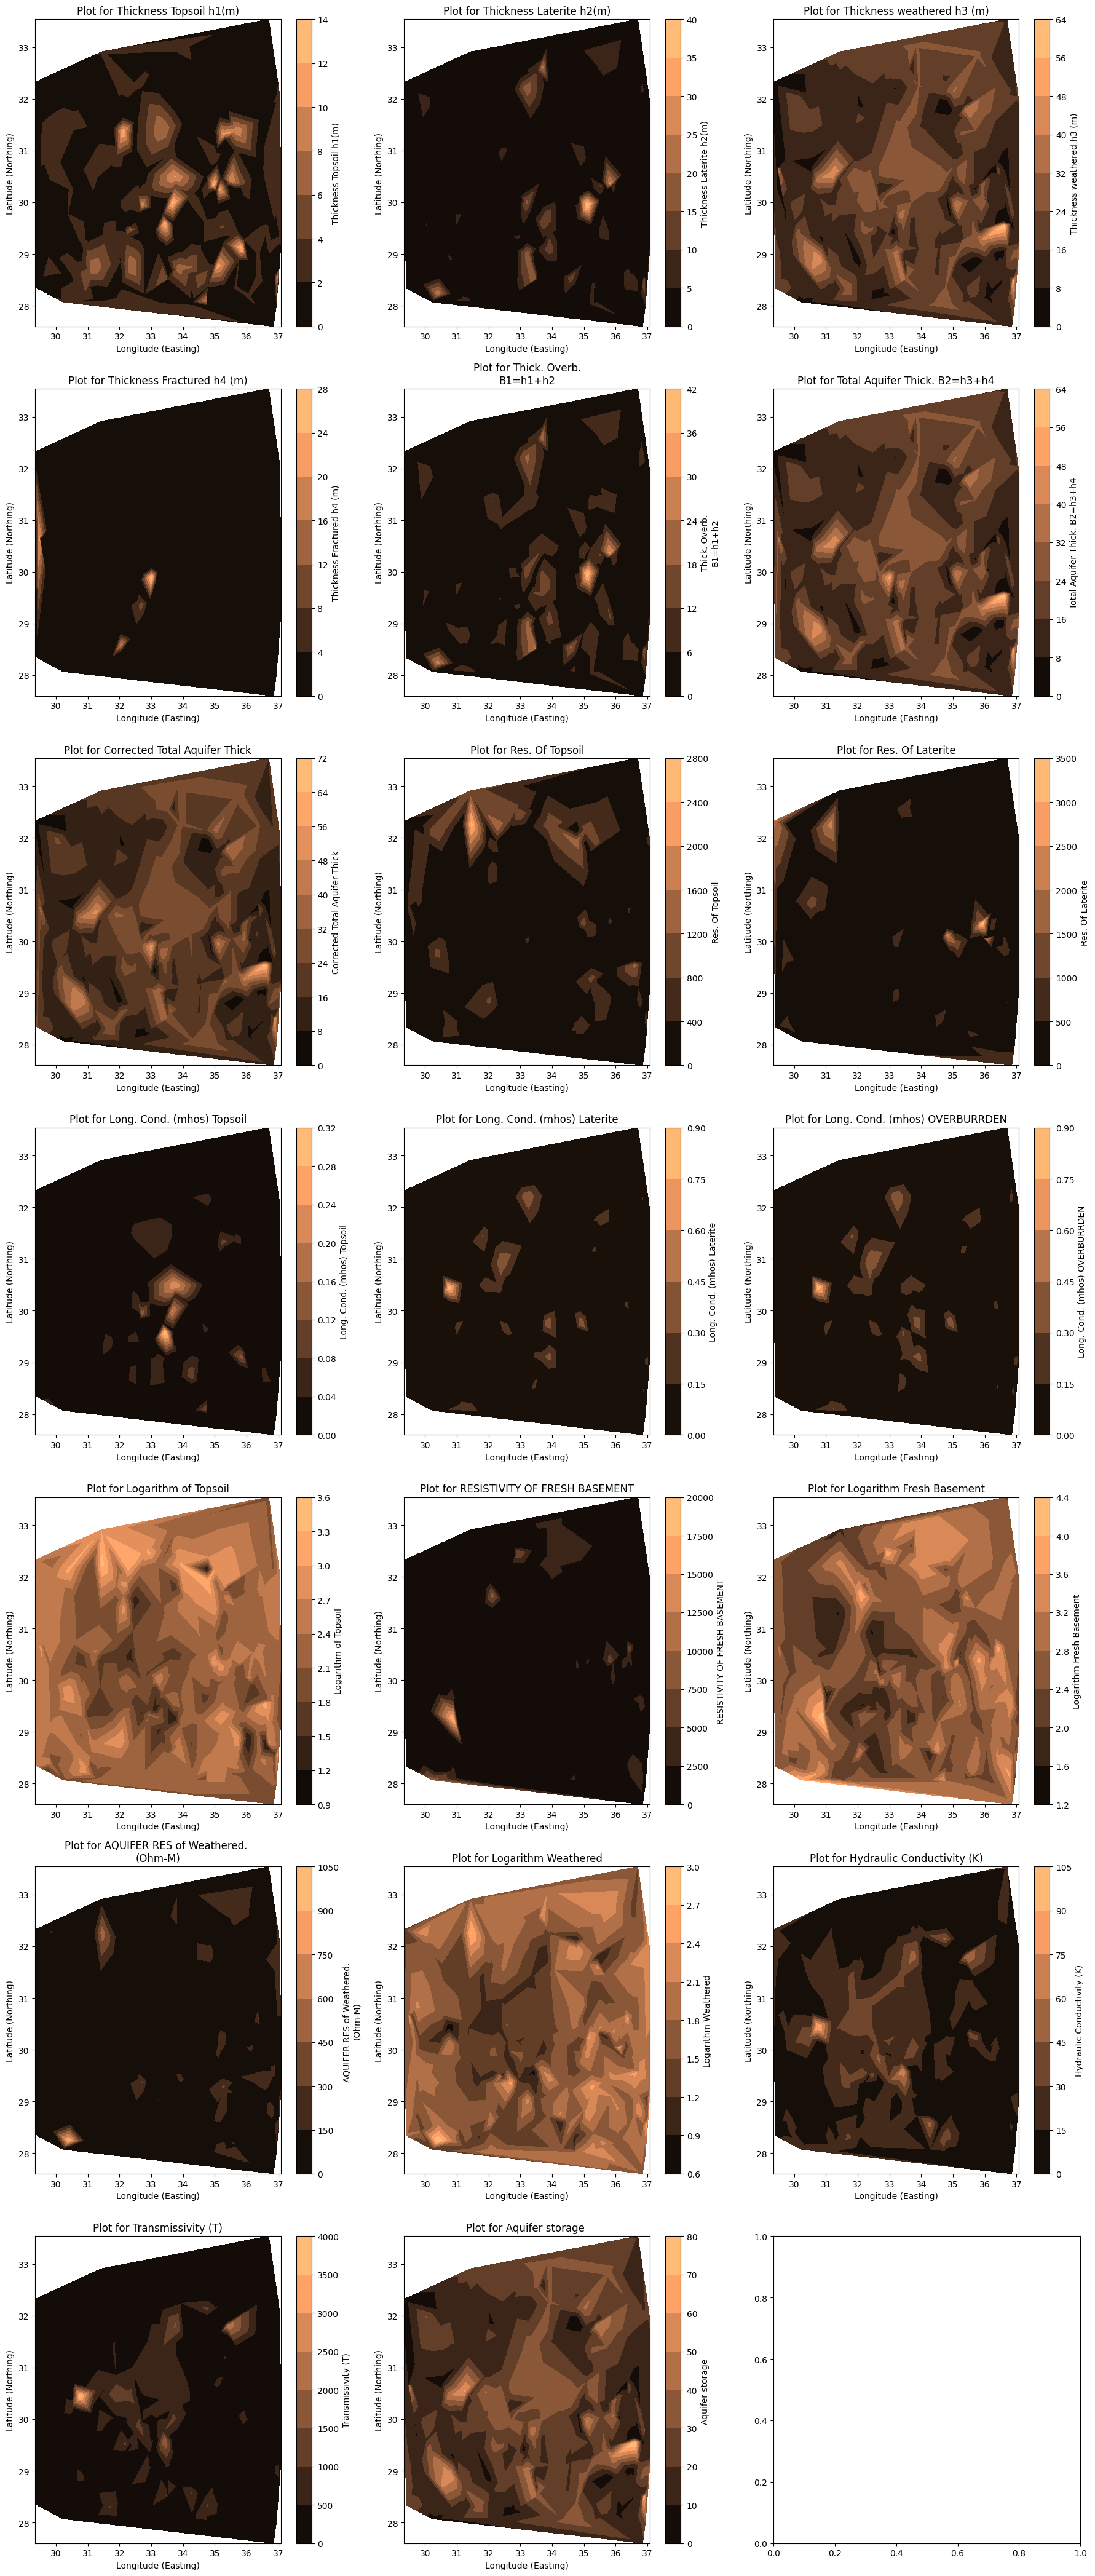

In [443]:
# Plot the raw features 
plot_features(df_1, cols_to_plot, False)

Plot db on the map to visualize VES points  

In [444]:
def plot_locations(df):
    # Create a scatter plot
    fig, ax = plt.subplots(figsize=(6,7))

    ax.scatter(df['Easting (Min)'], df['Northing (Min)'], marker='o', color='red')
    
    # Set labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Locations on Map')
    
    # Show plot
    plt.show()

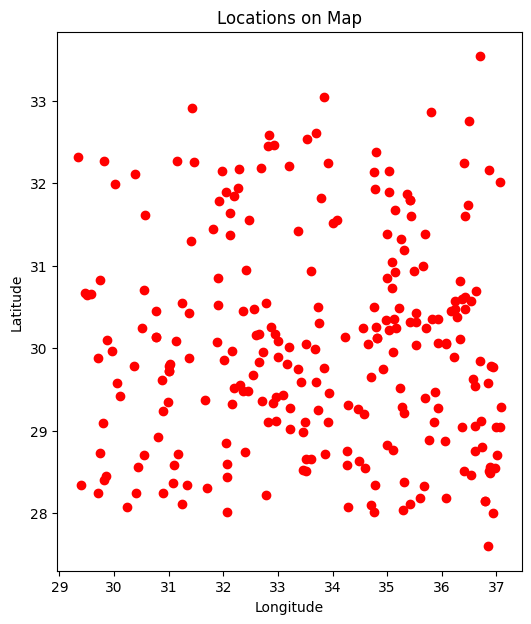

In [445]:
plot_locations(df_1)

### Plot Insights 

- The plot for the thickness of the weathered layer is very similar to the plot for the aquifer storage. 
The goal of the final model is to predict the aquifer storage. This is insightful because this project can investigate how the final model would be improved or impaired by that feature. 

- This same distinction can be seen when comparing the total aquifer thickness with the aquifer storage (this is logical as the larger the aquifer, the larger the expected yield of the aquifer.)

- From the plots some features could be removed, as they seem to be duplicates from a prediction point of view. e.g, corrected thicknesses, fracture thickness

## Rank Features 

Rank the features with different methods, in order to decide which features would be the most important for the study.
Three correlation methods are considered for this; 

- Pearson
- Spearman
- Kendall


In [446]:
# Create a function to plot correlation analysis
def plot_correlation_analysis(df, columns_to_check, column_to_correlate_against):
    '''
    Perform and plot correlation analysis between specified columns and a target column in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data.
    - columns_to_check (list of str): A list of column names to calculate correlation coefficients for.
    - column_to_correlate_against (str): The name of the column to correlate the specified columns against.

    '''
    # Initialize a DataFrame to store the correlation results
    correlation_results = []
    
    # Loop through each column to calculate correlation coefficients
    for column in columns_to_check:
        pearson_corr, _ = pearsonr(df[column], df[column_to_correlate_against])
        spearman_corr, _ = spearmanr(df[column], df[column_to_correlate_against])
        kendall_corr, _ = kendalltau(df[column], df[column_to_correlate_against])
        
        # Append the results to the list as a dictionary
        correlation_results.append({
            'Variable': column,
            'Pearson': pearson_corr,
            'Spearman': spearman_corr,
            'Kendall': kendall_corr
        })
    
    # Convert the list to a DataFrame
    correlation_results_df = pd.DataFrame(correlation_results)
    correlation_results_df = correlation_results_df.melt(id_vars=['Variable'], var_name='Correlation Type', value_name='Coefficient')
    print(correlation_results_df)

    # Plotting
    sns.catplot(x='Coefficient', y='Variable', hue='Correlation Type', data=correlation_results_df, kind='bar', height=5, aspect=2)
    plt.title(f'Correlation Analysis with {column_to_correlate_against}')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Variables')
    plt.tight_layout()
    plt.show()

In [447]:
features_to_corr = [
      'Thickness Topsoil h1(m)', 'Thickness Laterite h2(m)',
       'Thickness weathered h3 (m)',
       'Thickness Fractured h4 (m)', 
       'Thick. Overb.\nB1=h1+h2', 'Total Aquifer Thick. B2=h3+h4',
       'Res. Of Topsoil', 'Res. Of Laterite', 'Long. Cond. (mhos) Topsoil',
       'Long. Cond. (mhos) Laterite', 'Long. Cond. (mhos) OVERBURRDEN',
       'Logarithm of Topsoil', 'RESISTIVITY OF FRESH BASEMENT',
       'Logarithm Fresh Basement', 'AQUIFER RES of Weathered. \n(Ohm-M)',
       'Logarithm Weathered', 'Hydraulic Conductivity (K)',
       'Transmissivity (T)', 
]


                               Variable Correlation Type  Coefficient
0               Thickness Topsoil h1(m)          Pearson     0.149565
1              Thickness Laterite h2(m)          Pearson     0.121427
2            Thickness weathered h3 (m)          Pearson     0.999225
3            Thickness Fractured h4 (m)          Pearson    -0.016601
4               Thick. Overb.\nB1=h1+h2          Pearson     0.182830
5         Total Aquifer Thick. B2=h3+h4          Pearson     0.974173
6                       Res. Of Topsoil          Pearson    -0.051762
7                      Res. Of Laterite          Pearson    -0.093737
8            Long. Cond. (mhos) Topsoil          Pearson     0.199653
9           Long. Cond. (mhos) Laterite          Pearson     0.121976
10       Long. Cond. (mhos) OVERBURRDEN          Pearson     0.184247
11                 Logarithm of Topsoil          Pearson    -0.084771
12        RESISTIVITY OF FRESH BASEMENT          Pearson    -0.119565
13             Logar

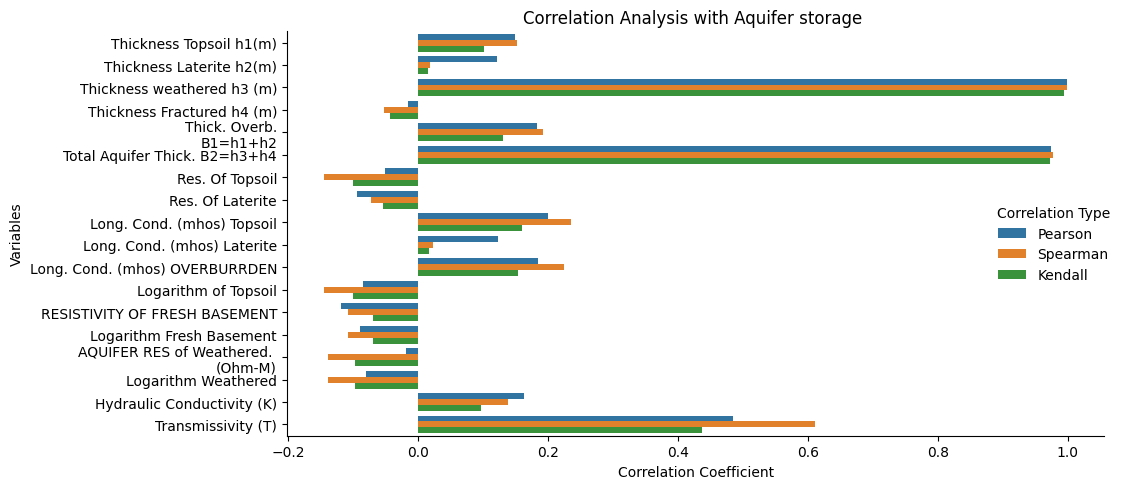

In [448]:
plot_correlation_analysis(df_1, features_to_corr, 'Aquifer storage ')

### Insights from the plot

Two features, weathered thickness and aquifer thickness seem to be very highly correlated with aquifer storage. 
The following features will be selected for training from the plots; 
1. Thickness Topsoil h1(m) 
2.  Thickness weathered h3 (m) ( high correlation )
3. Thick. Overb.\nB1=h1+h2 
4. Total Aquifer Thick. B2=h3+h4 ( high correlation )
5. Long. Cond. (mhos) OVERBURRDEN
6. Long. Cond. (mhos) Topsoil
7. Transmissivity (T) 

the features selected generally have correlation greater than or equal to 0.2 


In [449]:
# The following features will be used for the rest of the analysis. 
all_selected_features = [
       'Thickness Topsoil h1(m)', 
       'Thickness weathered h3 (m)',
       'Thick. Overb.\nB1=h1+h2', 
       'Total Aquifer Thick. B2=h3+h4',
       'Long. Cond. (mhos) OVERBURRDEN',
       'Long. Cond. (mhos) Topsoil',
       'Transmissivity (T)', 
]

features_without_high_corr = [
       'Thickness Topsoil h1(m)', 
       'Thick. Overb.\nB1=h1+h2', 
       'Long. Cond. (mhos) Topsoil',
       'Long. Cond. (mhos) OVERBURRDEN',
       'Transmissivity (T)', 
]


features_without_weathered_thick = [
       'Thickness Topsoil h1(m)', 
       'Thick. Overb.\nB1=h1+h2', 
       'Total Aquifer Thick. B2=h3+h4',
       'Long. Cond. (mhos) OVERBURRDEN',
       'Long. Cond. (mhos) Topsoil',
       'Transmissivity (T)', 

]



features_without_aquifer_thick = [
       'Thickness Topsoil h1(m)', 
       'Thickness weathered h3 (m)',
       'Thick. Overb.\nB1=h1+h2', 
       'Long. Cond. (mhos) OVERBURRDEN',
       'Long. Cond. (mhos) Topsoil',
       'Transmissivity (T)', 
]


## Section 3: Preprocessing data 

The selected features have been broken down into categories. In order to pre-process the data, two major step taken is to transform the features. 

## Transform features

It is important to do some level of feature transformation in any machine learning project. The idea is to modify the features in the dataset to improve the performance and accuracy of the machine learning models.  



In [450]:
# function to scale features as needed 
def scale_features(df, feature_columns, label):
    """
    Scales the specified features in the DataFrame using StandardScaler.
    
    Parameters:
    - df: pandas DataFrame containing the data.
    - feature_columns: List of column names to be scaled.    
    - label: String name of the label column

    """
    scaler = StandardScaler()
    
    # Copy the original DataFrame to avoid modifying it directly
    df_scaled = df.copy()

    df_scaled = df_scaled[feature_columns]
    
    # Scale the specified features
    df_scaled[feature_columns] = scaler.fit_transform(df_scaled[feature_columns])

    df_scaled['Aquifer Storage'] = df[label]    
    df_scaled["VES S/N"] = df["VES S/N"]
    df_scaled[["Easting (Min)",	"Northing (Min)"]]  = df[["Easting (Min)",	"Northing (Min)"]]
    return df_scaled



In [451]:
# feature scaling for all feature groups 
# creating scaled version of all  feature groups 
df_all_predicted = scale_features(df_1, all_selected_features, 'Aquifer storage ')
df_without_high_corr  = scale_features(df_1, features_without_high_corr, 'Aquifer storage ')
df_without_weathered_thick  = scale_features(df_1, features_without_weathered_thick, 'Aquifer storage ')
df_without_aquifer_thick = scale_features(df_1, features_without_aquifer_thick, 'Aquifer storage ')

In [452]:
df_all_predicted.head()

Thickness Topsoil h1(m)  Thickness weathered h3 (m)  \
0                -0.468424                    0.641042   
1                -0.590811                    0.565512   
2                -0.590811                   -0.858771   
3                -0.550016                   -1.160891   
4                 0.102715                    4.827571   

   Thick. Overb.\nB1=h1+h2  Total Aquifer Thick. B2=h3+h4  \
0                 0.273002                       0.596086   
1                -0.407114                       0.522118   
2                -0.709387                      -0.872713   
3                -0.690495                      -1.168587   
4                -0.388222                       4.696045   

   Long. Cond. (mhos) OVERBURRDEN  Long. Cond. (mhos) Topsoil  \
0                       -0.234145                   -0.309435   
1                       -0.505891                   -0.519935   
2                        0.098037                    1.365838   
3                       -0.523319                   -0.479188   
4                       -0.533278                   -0.508759   

   Transmissivity (T)  Aquifer Storage  VES S/N  Easting (Min)  Northing (Min)  
0           -0.179934         30.01752        1          36.94           28.00  
1           -0.657226         29.11956        2          36.73           28.80  
2           -0.598868         12.18660        3          36.60           28.75  
3           -0.738212          8.59476        4          36.84           29.58  
4           -0.465206         79.79016        5          36.60           29.54

In [453]:
df_without_high_corr.head()

Thickness Topsoil h1(m)  Thick. Overb.\nB1=h1+h2  \
0                -0.468424                 0.273002   
1                -0.590811                -0.407114   
2                -0.590811                -0.709387   
3                -0.550016                -0.690495   
4                 0.102715                -0.388222   

   Long. Cond. (mhos) Topsoil  Long. Cond. (mhos) OVERBURRDEN  \
0                   -0.309435                       -0.234145   
1                   -0.519935                       -0.505891   
2                    1.365838                        0.098037   
3                   -0.479188                       -0.523319   
4                   -0.508759                       -0.533278   

   Transmissivity (T)  Aquifer Storage  VES S/N  Easting (Min)  Northing (Min)  
0           -0.179934         30.01752        1          36.94           28.00  
1           -0.657226         29.11956        2          36.73           28.80  
2           -0.598868         12.18660        3          36.60           28.75  
3           -0.738212          8.59476        4          36.84           29.58  
4           -0.465206         79.79016        5          36.60           29.54

## Key insights 
- Features are now scaled as seen in the printed out values of the data 
- Aquifer storage has been renamed to label just for clarity and to make it easy to work with

### Split data and train ML model

The scaled data will be split at a ratio of 70:30. 
- 70% of the data will be used for training the model 
- 30% of the data will be used for testing the data 

Multiple ML models will be tested to evaluate which works best 
This is a regression problem so the major regression models will e evaluated on effectiveness;

1. Linear Regression
2. Decision Tree Regression
3. Random Forest Regressor
4. Linear SVR




In [454]:
def evaluate_models(df, features, target, models=None, title=""):
    # Split the data into features (X) and target (y)
    features_with_sn = features + ["VES S/N"]
    X = df[features_with_sn]
    y = df[target]
    
    default_models = [
        ('Linear Regression', LinearRegression()),
        ('Decision Tree Regressor', DecisionTreeRegressor()),
        ('Random Forest Regressor', RandomForestRegressor()),
        ("Linear SVR", LinearSVR())
    ]
    
    # If no models are provided, use the default models
    if models is None:
        models = default_models
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_with_sn = X_train.copy()
    X_test_with_sn = X_test.copy()
    X_train = X_train.drop("VES S/N", axis=1)
    X_test = X_test.drop("VES S/N", axis=1)    
    results = []
    best_score = float('-inf')
    best_model = None
    
    for name, model in models:
        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
        cv_mean = np.mean(cv_scores)
        
        # Fit the model on the full training data and evaluate on the test set
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        test_df = df.loc[X_test.index].copy()
        predicted_col_name = f'Predicted {target}'
        test_df[predicted_col_name] = y_pred
        test_df["VES S/N"] = X_test_with_sn["VES S/N"]
        plot_features(test_df, [target, predicted_col_name], title=f"{name} with accuracy (cv mean) of {cv_mean} " + title, add_scatter=True)

        test_score = mean_squared_error(y_test, y_pred, squared=False) # RMSE
        
        results.append({
            'Model': name,
            'Average Accuracy (CV Mean Score)': cv_mean,
            'Test Score': test_score
        })
        
        # Update the best model if this model has a better score
        if cv_mean > best_score:
            best_score = cv_mean
            best_model = model
    
    results_df = pd.DataFrame(results)    

    # Print the best model
    print(f"{best_model} is the best model with a CV mean score / accuracy score of {best_score}.")
    # Predict with the best model for the test dataset
    predicted_col_name = f'Predicted {target}'
    test_predictions = best_model.predict(X_test)
    test_df = df.loc[X_test.index].copy()
    test_df[predicted_col_name] = test_predictions
    test_df["VES S/N"] = X_test_with_sn["VES S/N"]


    # Return the evaluation results and the DataFrame with predictions only for test set
    return results_df, test_df


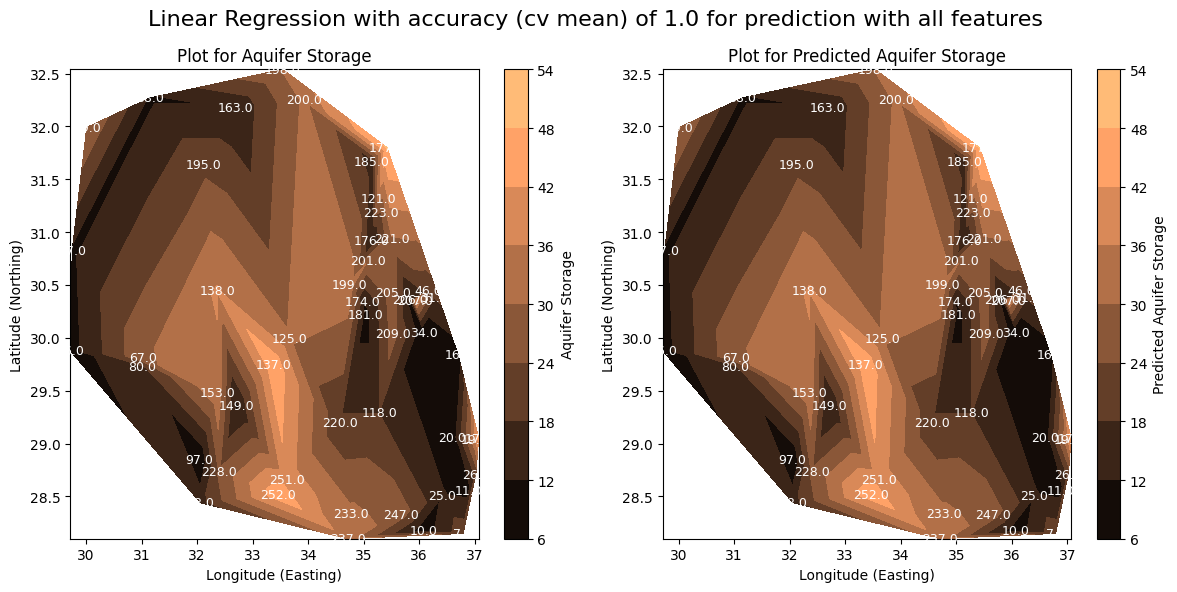

/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


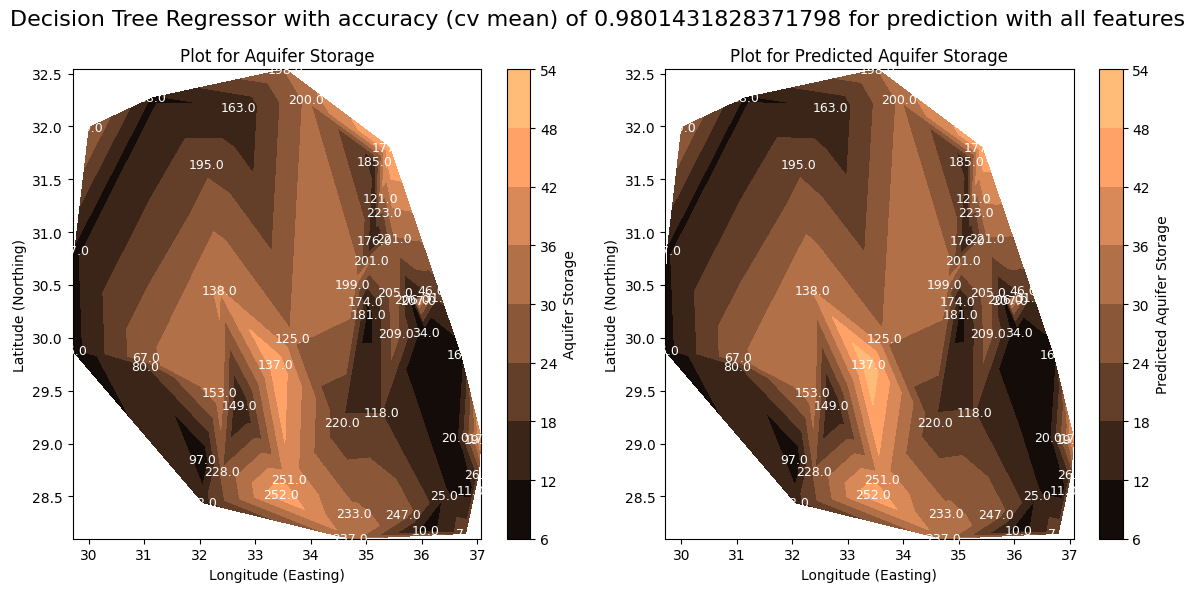

/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


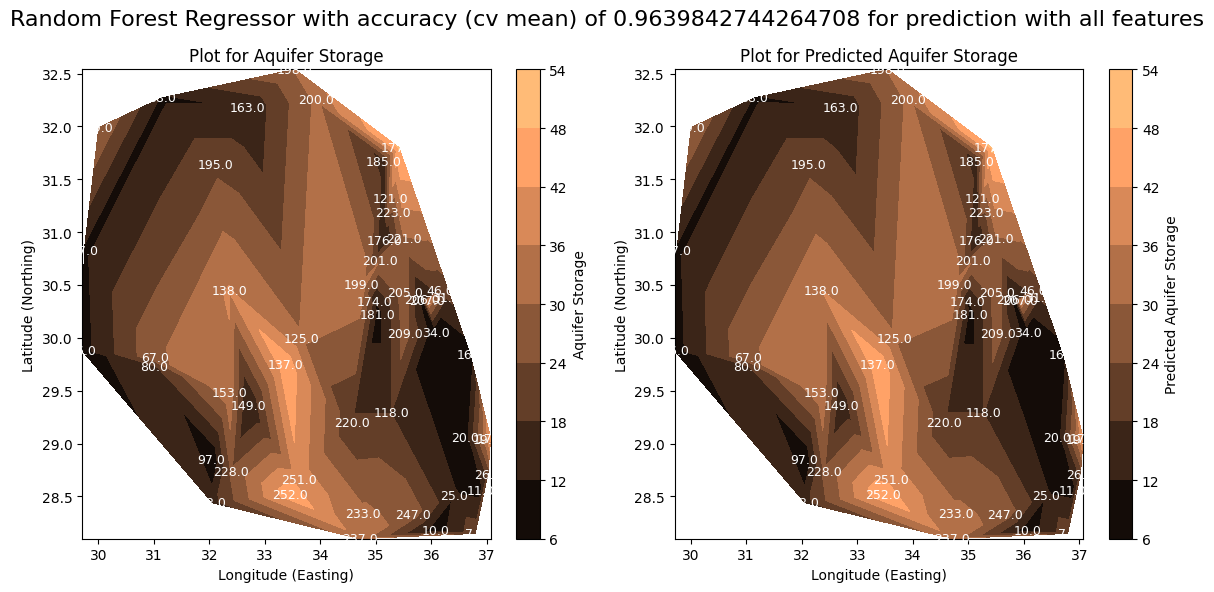

/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. S

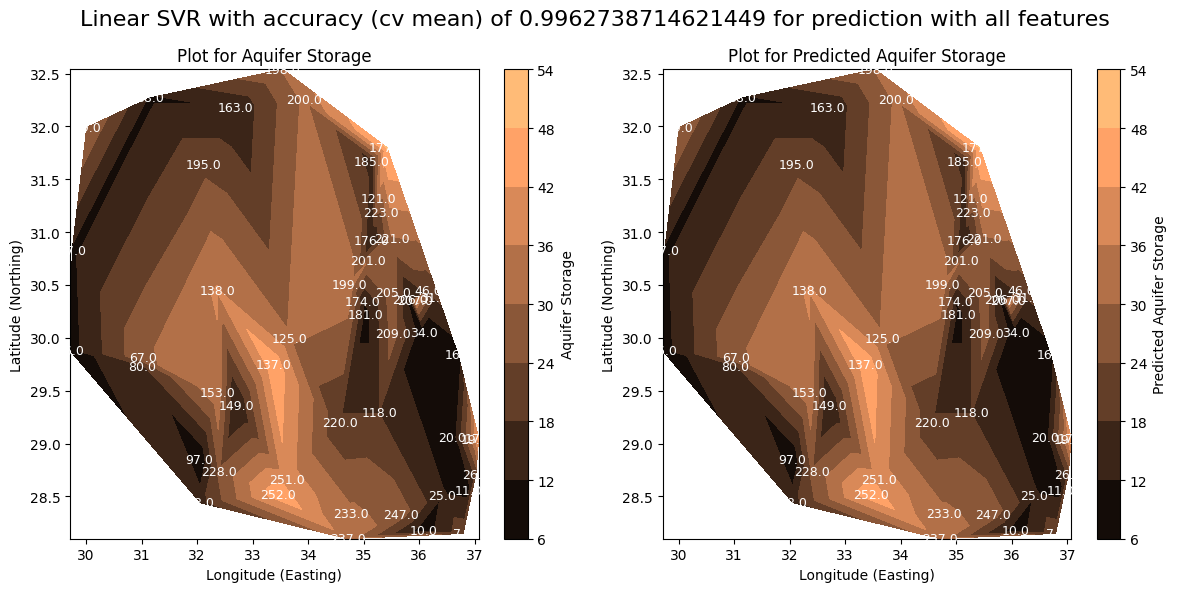

LinearRegression() is the best model with a CV mean score / accuracy score of 1.0.


/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [455]:
results, df_pred = evaluate_models(df_all_predicted, all_selected_features, 'Aquifer Storage', title="for prediction with all features")

Plot data points of predicted values 

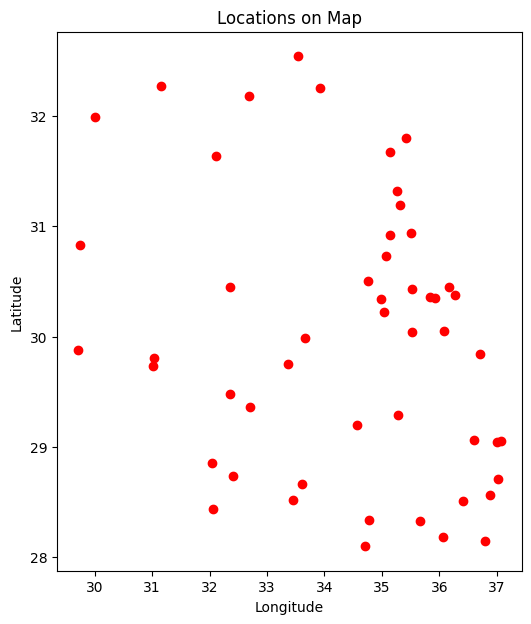

In [456]:
plot_locations(df_pred)

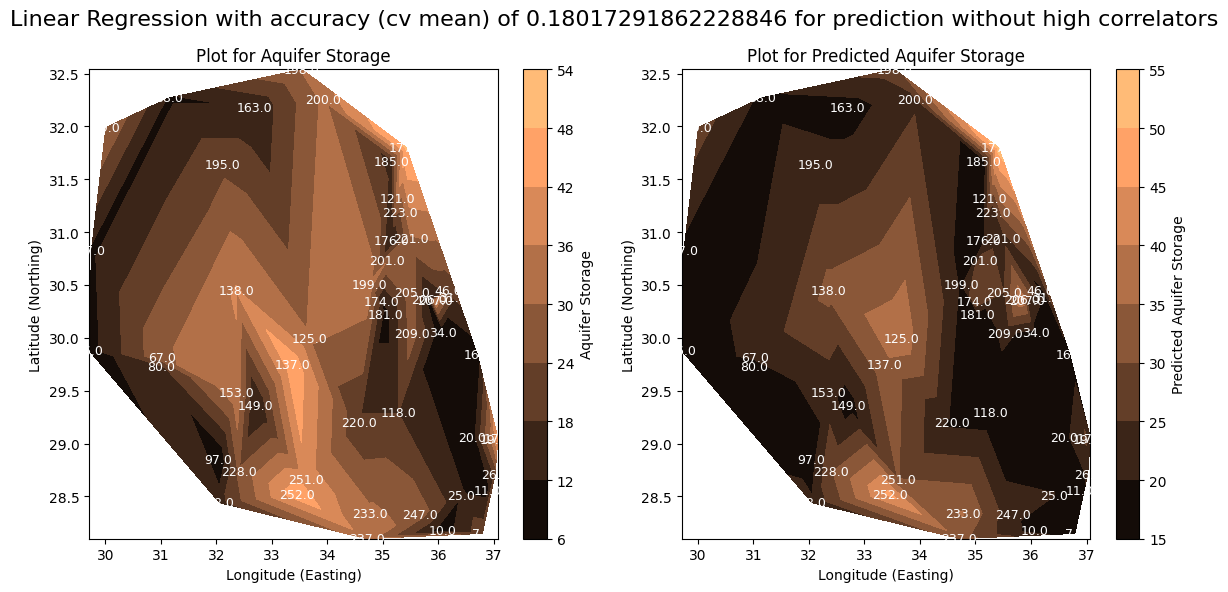

/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


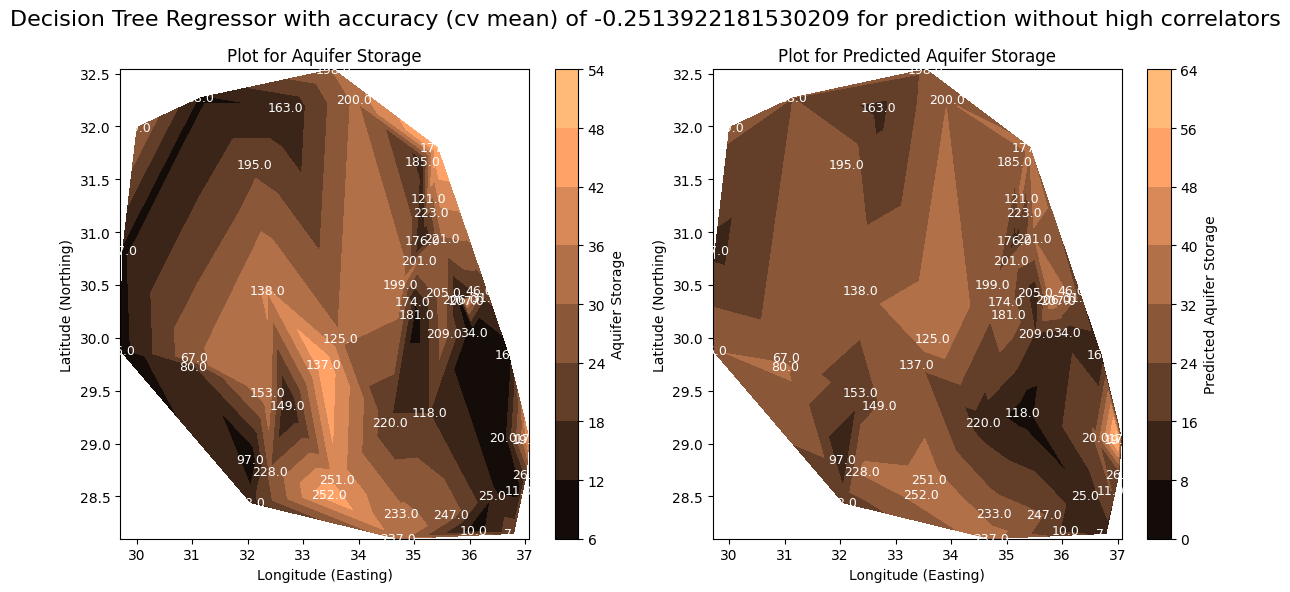

/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


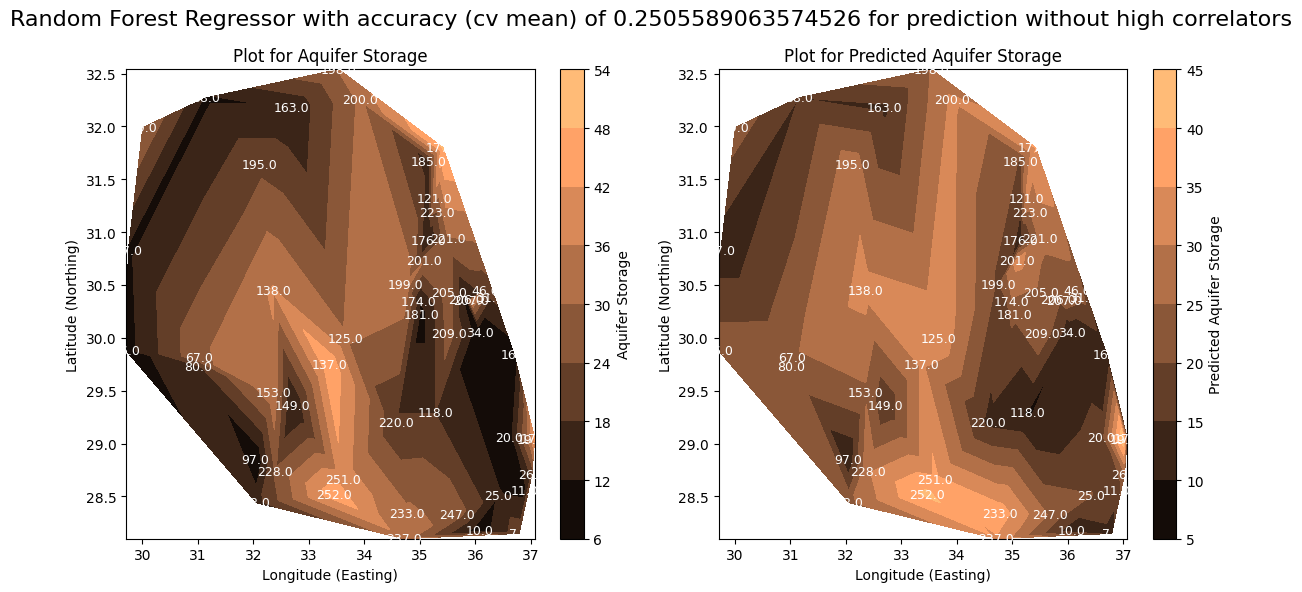

/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. S

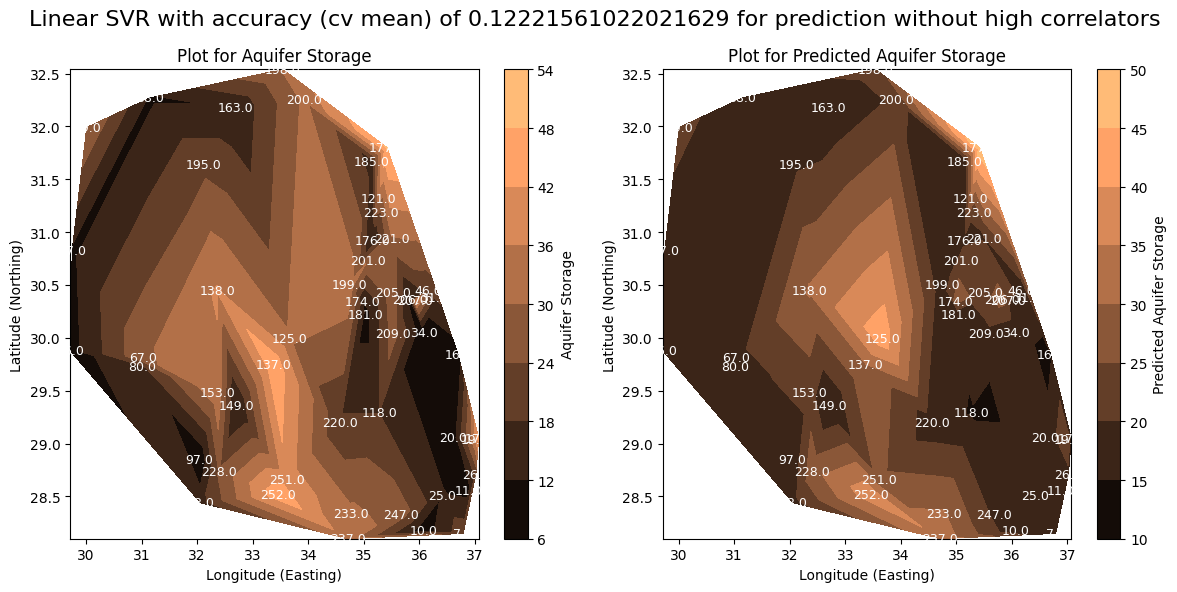

RandomForestRegressor() is the best model with a CV mean score / accuracy score of 0.2505589063574526.


/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [457]:
results_whc, df_pred_whc  = evaluate_models(df_without_high_corr, features_without_high_corr, 'Aquifer Storage', title="for prediction without high correlators")

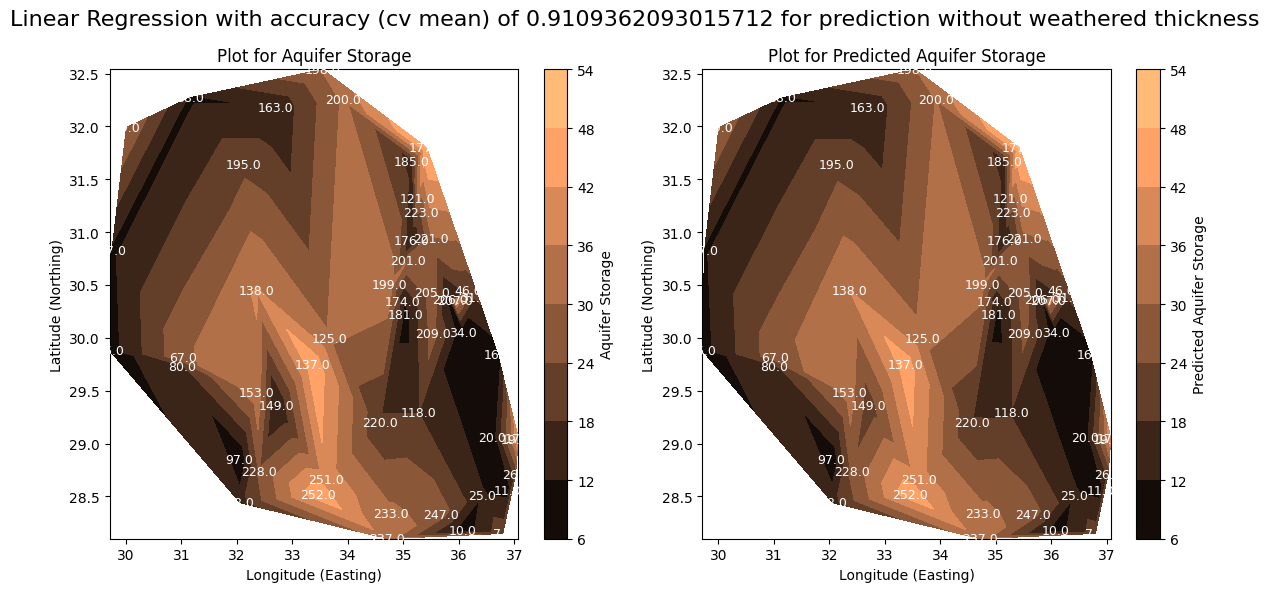

/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


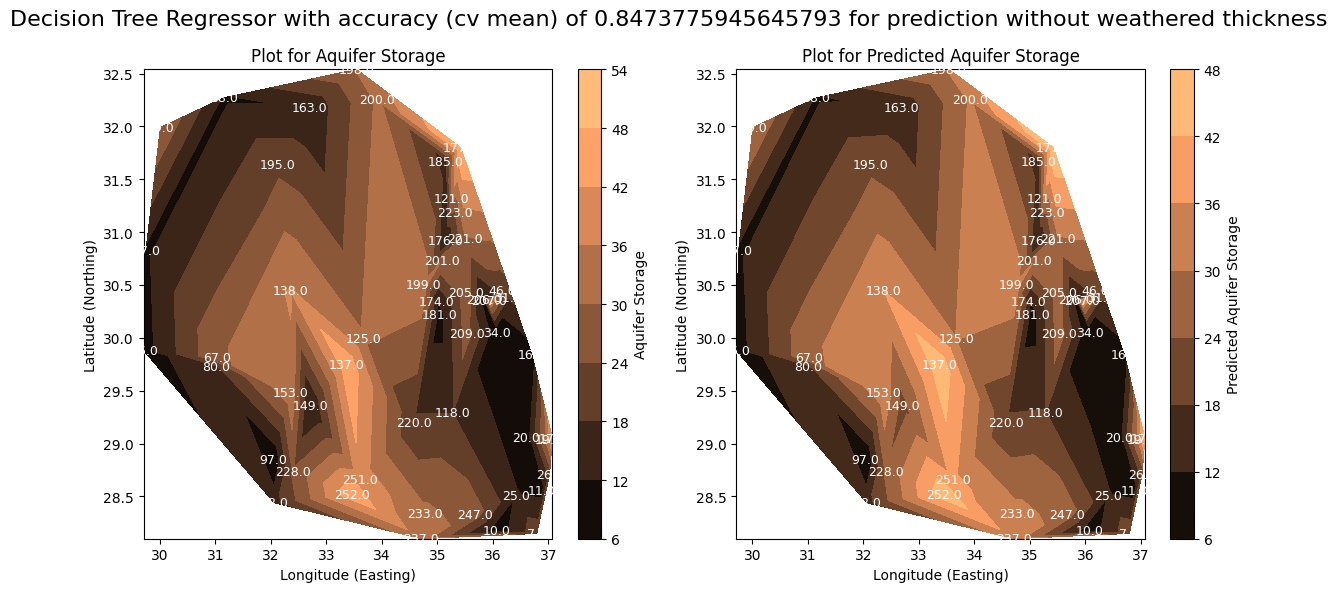

/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


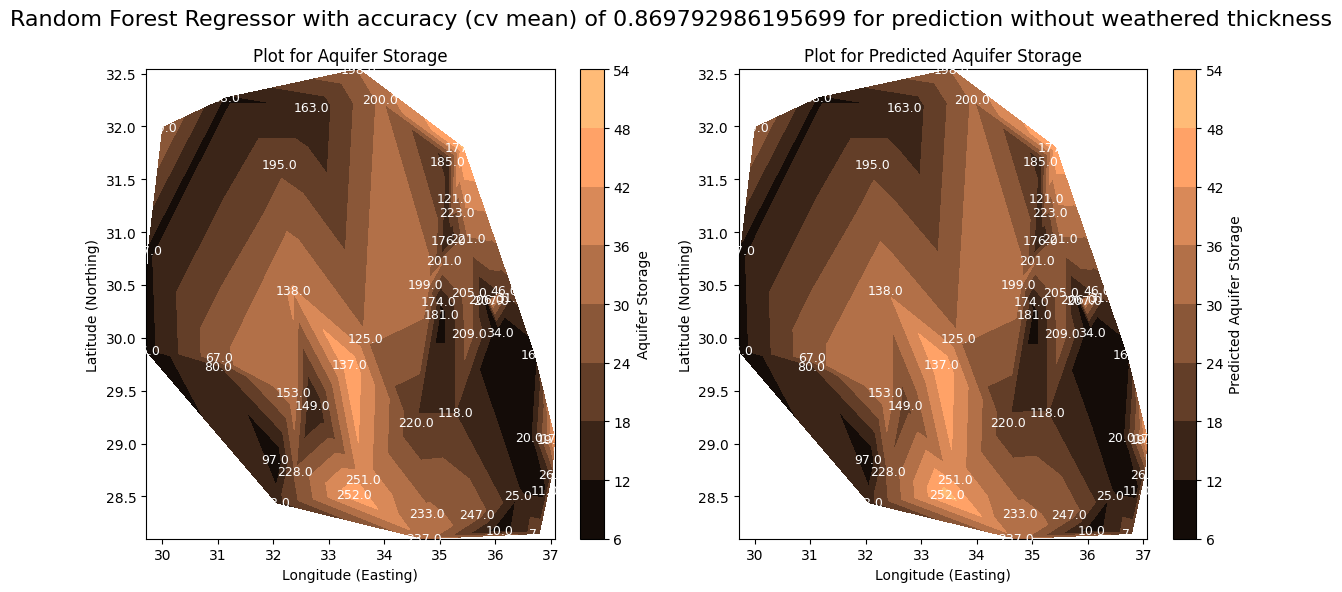

/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. S

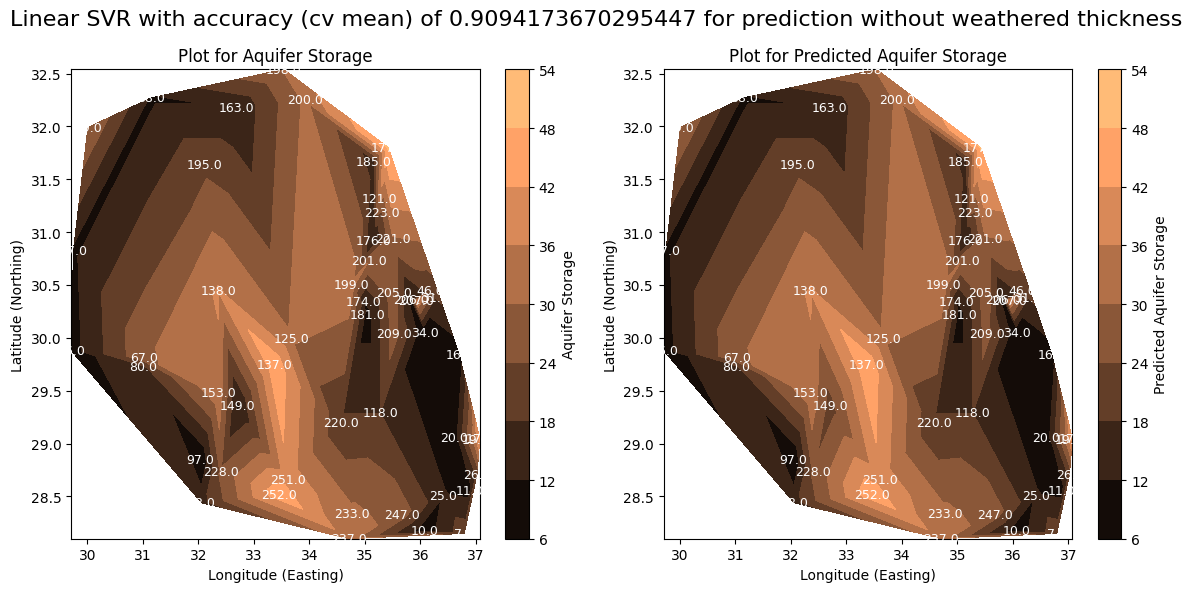

LinearRegression() is the best model with a CV mean score / accuracy score of 0.9109362093015712.


/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [458]:
results_wwt, df_pred_wwt  = evaluate_models(df_without_weathered_thick, features_without_weathered_thick, 'Aquifer Storage', title="for prediction without weathered thickness")

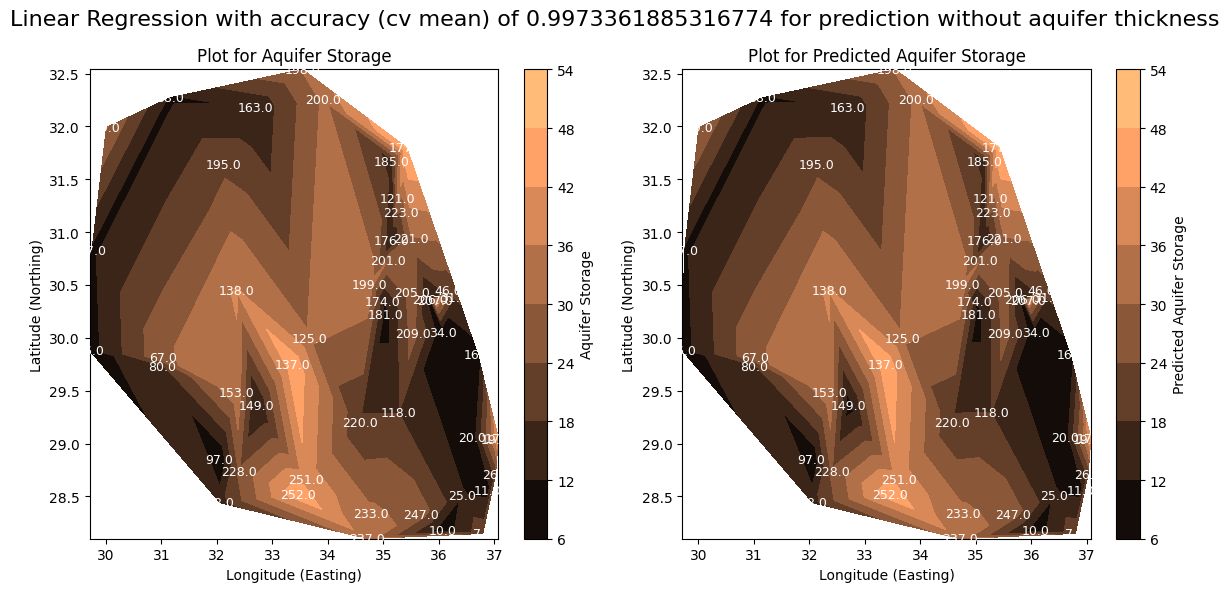

/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


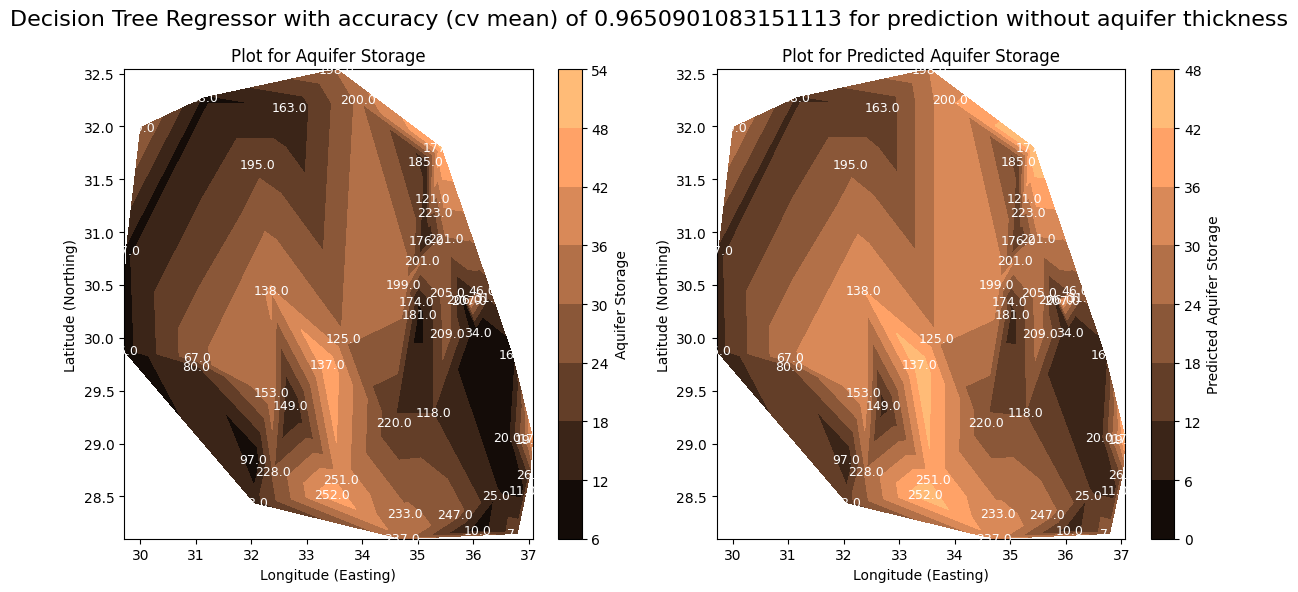

/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


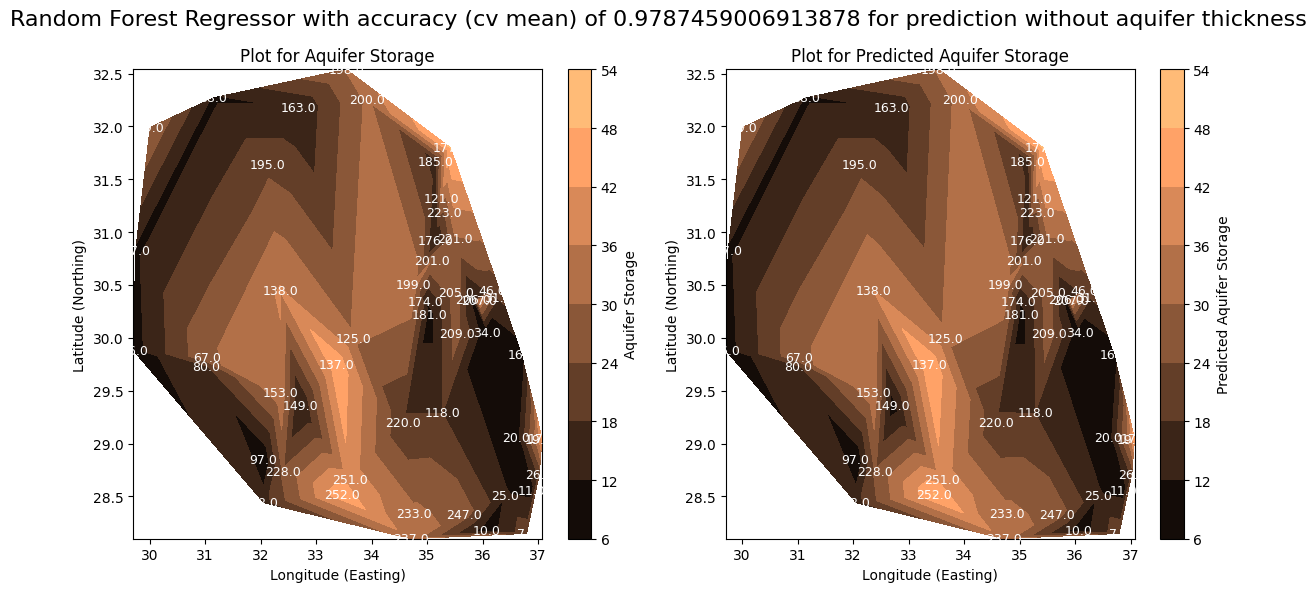

/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. S

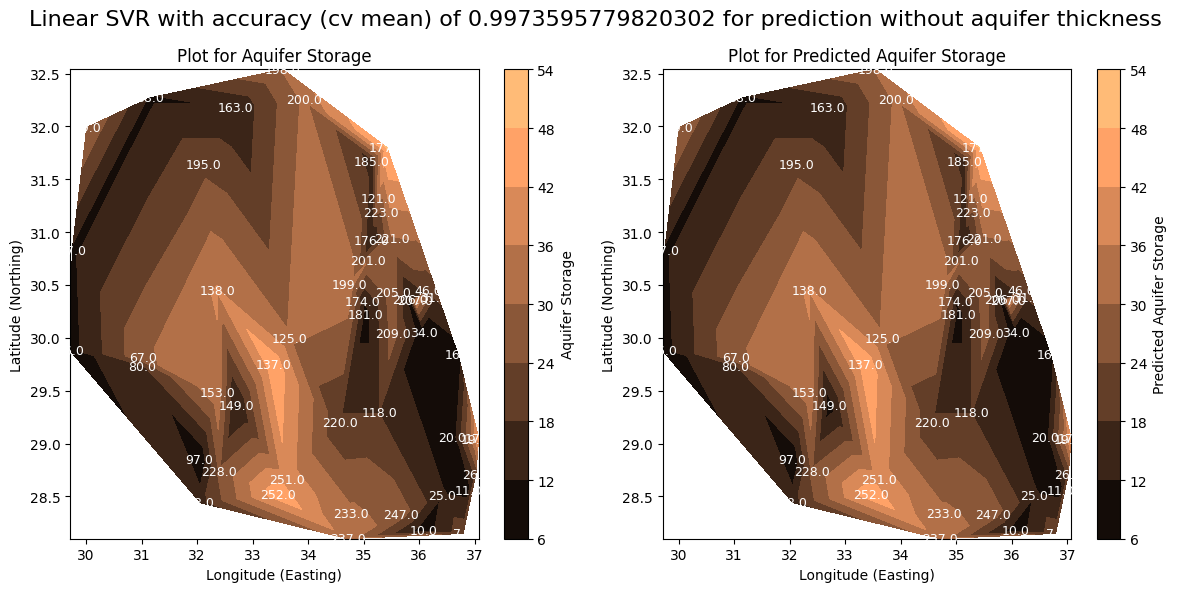

LinearSVR() is the best model with a CV mean score / accuracy score of 0.9973595779820302.


/Users/ayomide/Work/ML/AquiferStorage/env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [459]:
results_wat, df_pred_wat  = evaluate_models(df_without_aquifer_thick, features_without_aquifer_thick, 'Aquifer Storage', title="for prediction without aquifer thickness")

# A plot showing the 30% subset of values we have 

In [460]:
filtered_df = df_1[df_1['VES S/N'].isin(df_pred_wat['VES S/N'])]

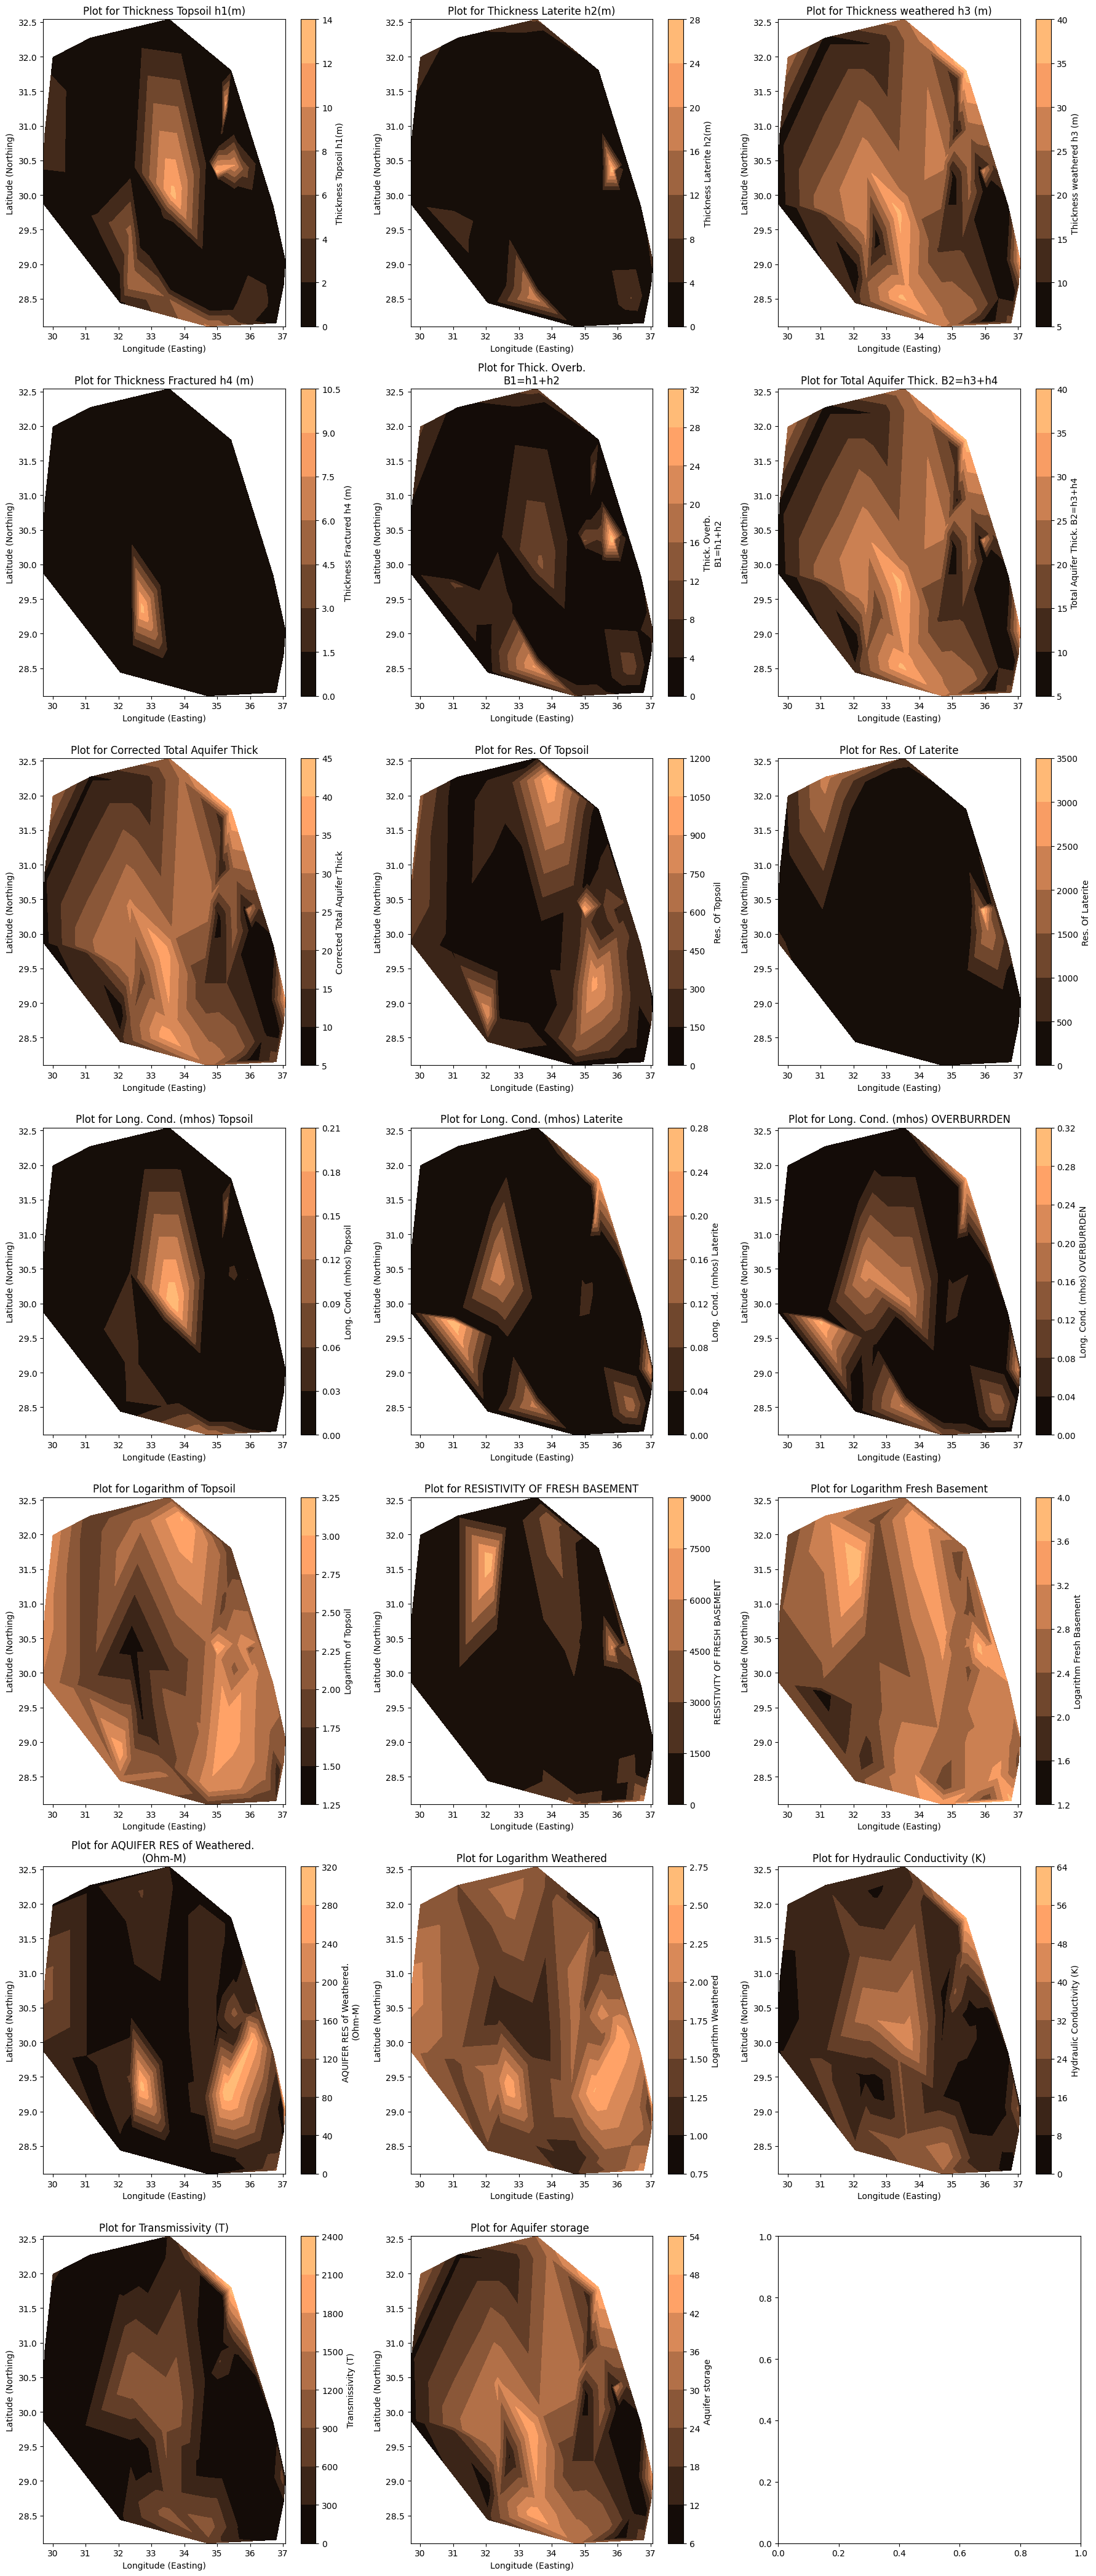

In [461]:
plot_features(filtered_df, cols_to_plot, False)

### Key Insights and Conclusion

The evaluation of the project on developing a machine learning model to predict aquifer storage capacity has yielded several important insights. A data split of 30:70 (test:training) was employed, and multiple models were trained to identify the one best suited for predicting aquifer storage. The models were evaluated across different feature groups, highlighting the significance of feature selection in machine learning. Below are the key insights derived from testing these feature groups:

- **All Selected Features**:
  - **Features**: Thickness Topsoil h1(m), Thickness weathered h3 (m), Thick. Overb.\nB1=h1+h2, Total Aquifer Thick. B2=h3+h4, Long. Cond. (mhos) OVERBURRDEN, Long. Cond. (mhos) Topsoil, Transmissivity (T).
  - **Result**: Linear Regression emerged as the best model with a cross-validation (CV) mean score of 1.0. This indicates a potentially perfect prediction, suggesting a linear relationship between these features and the target variable.
  
- **Features Without High Correlation**:
  - **Features**: Excluding the two highest correlators (with correlation scores of 0.98 and above), the features used were Thickness Topsoil h1(m), Thick. Overb.\nB1=h1+h2, Long. Cond. (mhos) Topsoil, Long. Cond. (mhos) OVERBURRDEN, Transmissivity (T).
  - **Result**: RandomForestRegressor was the best model with a CV mean score of 0.239. The drop in CV score compared to the all features model suggests that the excluded features were significant predictors of aquifer storage.
  
- **Features Without Weathered Thickness**:
  - **Features**: After removing one of the highest correlators, the selected features included Thickness Topsoil h1(m), Thick. Overb.\nB1=h1+h2, Total Aquifer Thick. B2=h3+h4, Long. Cond. (mhos) OVERBURRDEN, Long. Cond. (mhos) Topsoil, Transmissivity (T).
  - **Result**: Linear Regression again proved to be the best model with a CV mean score of 0.9109, highlighting its robustness in capturing the relationship between the selected features and the target variable even after the exclusion of a significant predictor.

- **Features Without Aquifer Thickness**:
  - **Features**: By excluding one of the highest correlators, the remaining features were Thickness Topsoil h1(m), Thickness weathered h3 (m), Thick. Overb.\nB1=h1+h2, Long. Cond. (mhos) OVERBURRDEN, Long. Cond. (mhos) Topsoil, Transmissivity (T).
  - **Result**: LinearSVR emerged as the best model with a CV mean score of 0.9974, indicating excellent performance and suggesting that the remaining features still capture significant predictive power.

#### Conclusion

The evaluation across different feature groups has shown that careful feature selection is paramount in developing predictive models. While Linear Regression showed outstanding performance in two of the feature groupings, suggesting a strong linear relationship, RandomForestRegressor and LinearSVR's best performances in other groupings indicate the complexity and non-linear nature of the relationships in groundwater potential prediction. This analysis underscores the necessity of experimenting with both feature selection and various modeling approaches to identify the best predictor of aquifer storage.

## References 

- Raji, W.O., Abdulkadir, K.A. Evaluation of groundwater potential of bedrock aquifers in Geological Sheet 223 Ilorin, Nigeria, using geo-electric sounding. Appl Water Sci 10, 220 (2020). https://doi.org/10.1007/s13201-020-01303-2

